In [1]:
#furst we'll install all the basics library for numeric analysis,data visualization and manipulation of data!!
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Now we'll load the dataset
df=pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


## EDA Process

In [34]:
#will check the rows and columns
print('Total Rows are',df.shape[0])
print('Total Columns are',df.shape[1])
print(df.shape)

Total Rows are 158
Total Columns are 12
(158, 12)


In [65]:
#will check what all columns are present in the dataset
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [66]:
#will check the datatypes of all the attributes
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

#### Checking the Null Values 

In [67]:
#will check if null values are present
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

This shows us that there is no null values are present in this dataset

In [68]:
#will check the characteristic of Target variable as it is of classification type or regression type, here the target variable is float i.e. continuous value,so will apply regression on to it
df['Happiness Score'].value_counts()

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64

In [69]:
#can check uniqueness too
df['Happiness Score'].unique

<bound method Series.unique of 0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64>

### Using Label Encoder

In [3]:
#now will see if the dataset contains any string or object data type then will encode it into the numeric category form and will use Label or onehot encoder by seeing the characteristic
import sklearn
from sklearn.preprocessing import LabelEncoder

In [4]:
#now will encode as said above 
le=LabelEncoder()
L=['Country','Region']
for i in L:
    df[i]=le.fit_transform(df[i].astype(str))

In [5]:
#got the desired dataset now
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


### Statistics Concept

In [13]:
# now will implement statistics part to check the mean,median,skewness,standard deviation and etc.
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### Correlation & Multicollinearity

In [19]:
#now will check the correlation among all the independent variables w.r.t. Target variable
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<AxesSubplot:>

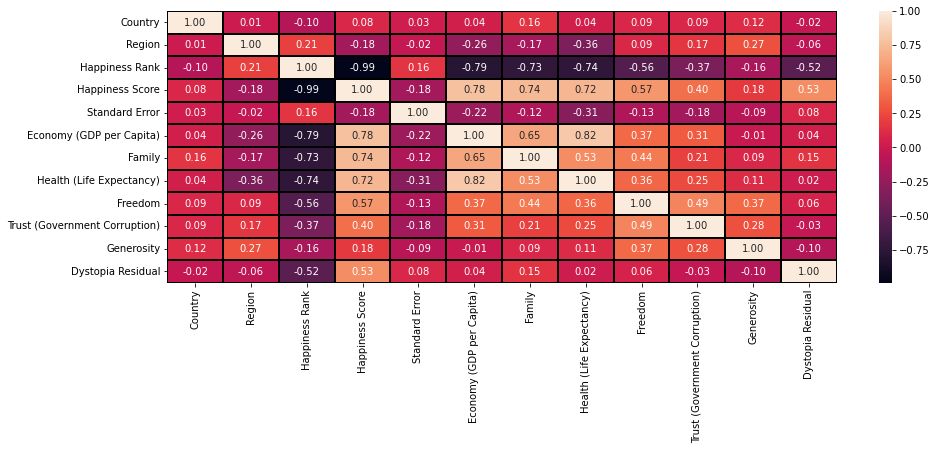

In [21]:
#will plot heatmap to see the visualization of correlation for more clarity
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor='black',fmt='0.2f')

we can clearly see in the above heatmap visulization that [Happiness Rank,Standard Error,Region & Country] are having negative correlation w.r.t. Happiness Score(Target Variable). But since Region & Country were the categorical object variables earlier hence we will not consider the both for making correlation prediction. Ergo, Happiness Rank and Standard Error are negatively correlated w.r.t. target.

In [22]:
#will check correlation w.r.t. Target 
df.corr()['Happiness Score']

Country                          0.083380
Region                          -0.176791
Happiness Rank                  -0.992105
Happiness Score                  1.000000
Standard Error                  -0.177254
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64

In [23]:
#we can also sort the above values of correlation in ascending or decending order
df.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Region                          -0.176791
Country                          0.083380
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

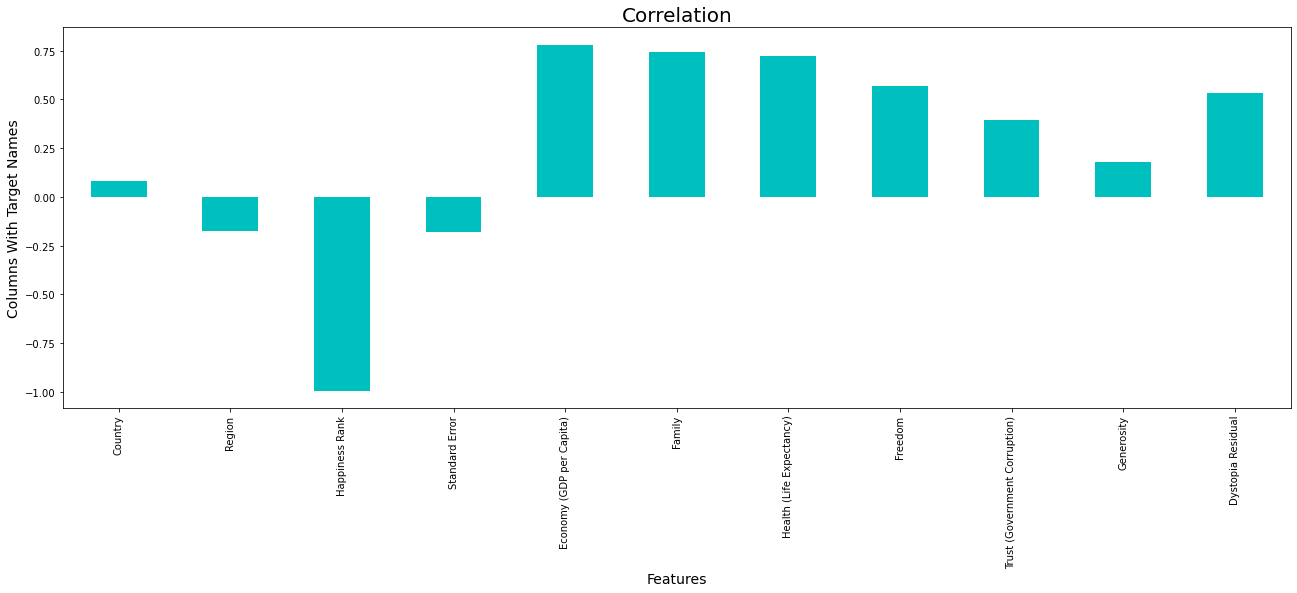

In [26]:
#we can also check the multicollinearirty with this visulaization 
plt.figure(figsize=(22,7))
df.corr()['Happiness Score'].drop(['Happiness Score']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Columns With Target Names',fontsize=14)
plt.title('Correlation',fontsize=20)
plt.show()

The above graph is clearly showing us that all the independent variables are giving different infromation to the target variables as they all are not equally correlated w.r.t. Target variables

### Skewness

In [27]:
#now will check skewness
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Will set the threshold value to (+-0.5). As we can see here [Standard Error,Family,Health (Life Expectancy),Trust (Government Corruption)& Generosity] are having skewness either left or right hand side.

### Univariate Data Visualization for Skewness

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

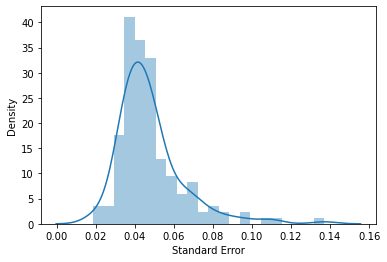

In [36]:
sns.distplot(df['Standard Error'])

since there is +ve skewness hence distribution skewed in right hand side

<AxesSubplot:xlabel='Family', ylabel='Density'>

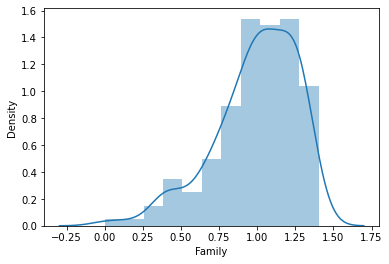

In [37]:
sns.distplot(df['Family'])

since there is negative skewness hence distribution skewed in left hand side

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

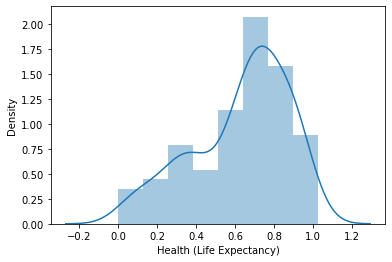

In [38]:
sns.distplot(df['Health (Life Expectancy)'])

since there is negative skewness hence distribution skewed in left hand side

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

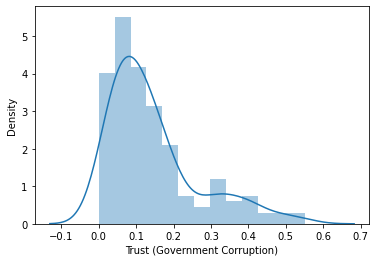

In [40]:
sns.distplot(df['Trust (Government Corruption)'])

since there is +ve skewness hence distribution skewed in right hand side

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

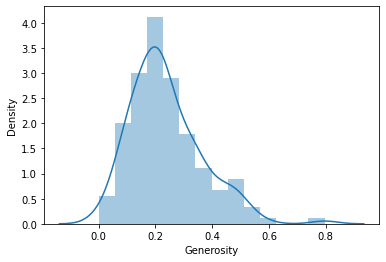

In [41]:
sns.distplot(df['Generosity'])

since there is +ve skewness hence distribution skewed in right hand side

### Outliers

In [6]:
#will check outliers in the dataset
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))

This is showing all the rows and columns containing outliers.Hence,the values in the rows & columns are greater than the threshold value 3.

In [32]:
#outliers present in row 27th
z.iloc[27]

Country                          0.800267
Region                           0.375441
Happiness Rank                   1.129016
Happiness Score                  1.082256
Standard Error                   0.859197
Economy (GDP per Capita)         2.101026
Family                           0.322476
Health (Life Expectancy)         0.678336
Freedom                          1.409878
Trust (Government Corruption)    3.164619
Generosity                       0.700286
Dystopia Residual                0.982677
Name: 27, dtype: float64

In [33]:
#the value of 27th rows and 9th column indicates an outlier
z.iloc[27,9]

3.1646194851713774

In [34]:
z.iloc[157,6]

3.1347248549706186

### Bi-Variate Data Visualization for Outliers or Abnormal  data

<Figure size 1512x648 with 0 Axes>

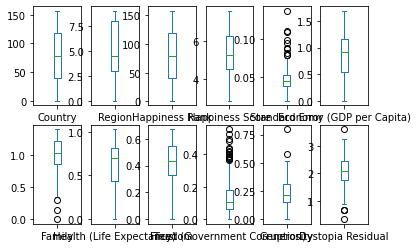

In [52]:
plt.figure(figsize=(21,9))
df.plot(kind='box',subplots=True,layout=(2,6))
plt.show()

We can Clearly see that Standard Error,Family&Trust (Government Corruption) have more outliers as comapre to others.

### Data Cleaning

In [53]:
#First will remove the negative correlated columns
#Then remove outliers
#and in last will remove skewness
                                             ##lest go ahead

In [7]:
#removing negative correlation
df_new=df.drop(['Happiness Rank','Standard Error'],axis=1)
df_new

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,118,8,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


We've successfully removed the negative correlated columns w.r.t. Target Variables

In [74]:
df.shape

(158, 12)

In [75]:
df_new.shape

(158, 10)

However,we have lost 2 Columns in this process

In [8]:
#removing outliers
df1=df_new[(z<3).all(axis=1)]
df1

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
150,66,8,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [77]:
#This shows we have lost 9 rows in this process
df1.shape

(149, 10)

In [82]:
loss_percentage=(158-149)/158*100
loss_percentage

5.69620253164557

As we can see that Approx 6% data have lost in this process which is still decent and it's showing that we are going good till now

In [84]:
#Checking skewness again as some columns are deleted
df1.skew()

Country                          0.048701
Region                          -0.096985
Happiness Score                  0.169740
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [85]:
#removing skewness
for i in ['Family','Health (Life Expectancy)','Trust (Government Corruption)','Generosity']:
    df1[i]=np.log(df1[i])

All the skewness has been removed and dataset are normally distributed

In [86]:
df1.shape

(149, 10)

### Moving into Machine Learning Portion

In [9]:
#Now we are seperating Feature variables and Target Variables
x=df1.drop('Happiness Score',axis=1)
x

,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,66,8,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [10]:
#Target Variable
y=df1['Happiness Score']
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

In [91]:
print(x.shape)
print(y.shape)

(149, 9)
(149,)


In [11]:
#Now will use standard scalar technique to make this data Normally distributed(but in this case dataset are normally distributed earlier)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [14]:
#will try to findout the best random_state value
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i}, the training accuracy is- {r2_score(pred_train,y_train)}')
    print(f'At random state {i}, the testing accuracy is- {r2_score(pred_test,y_test)}')
    print('\n')

At random state 0, the training accuracy is- 0.9999999428421662
At random state 0, the testing accuracy is- 0.9999999298322609


At random state 1, the training accuracy is- 0.9999999484062003
At random state 1, the testing accuracy is- 0.9999999112098709


At random state 2, the training accuracy is- 0.9999999417689565
At random state 2, the testing accuracy is- 0.9999999335752187


At random state 3, the training accuracy is- 0.9999999402486709
At random state 3, the testing accuracy is- 0.9999999319804559


At random state 4, the training accuracy is- 0.9999999253195581
At random state 4, the testing accuracy is- 0.9999999503778227


At random state 5, the training accuracy is- 0.9999999380484181
At random state 5, the testing accuracy is- 0.999999938270286


At random state 6, the training accuracy is- 0.9999999467538705
At random state 6, the testing accuracy is- 0.9999999132270283


At random state 7, the training accuracy is- 0.9999999517408268
At random state 7, the testing acc

In [15]:
#will train and test the model in this phase
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=33)
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print('r2_score is-',r2_score(pred_test,y_test))

r2_score is- 0.9999999314788411


### Cross Validation of the model

In [16]:
from sklearn.model_selection import cross_val_score
for k in range(2,10):
    cvscore=cross_val_score(lr,x,y,cv=k)
    mean=cvscore.mean()
    std=cvscore.std()
    print(f'At K-Fold {k} the cv score is {mean} and accuracy score for training is {r2_score(pred_train,y_train)} also the accuracy score for testing is {r2_score(pred_test,y_test)}')
    print('\n')

At K-Fold 2 the cv score is 0.9999996739553119 and accuracy score for training is -0.7970883230713177 also the accuracy score for testing is 0.9999999314788411


At K-Fold 3 the cv score is 0.9999994584410556 and accuracy score for training is -0.7970883230713177 also the accuracy score for testing is 0.9999999314788411


At K-Fold 4 the cv score is 0.9999987334549006 and accuracy score for training is -0.7970883230713177 also the accuracy score for testing is 0.9999999314788411


At K-Fold 5 the cv score is 0.9999981846097388 and accuracy score for training is -0.7970883230713177 also the accuracy score for testing is 0.9999999314788411


At K-Fold 6 the cv score is 0.9999972408541873 and accuracy score for training is -0.7970883230713177 also the accuracy score for testing is 0.9999999314788411


At K-Fold 7 the cv score is 0.9999955787712542 and accuracy score for training is -0.7970883230713177 also the accuracy score for testing is 0.9999999314788411


At K-Fold 8 the cv score is 

Since the number of folds doesn't have such impact on the accuracy and cvscore.So CV=2 is selected.
also,here we have handled the problem of overfitting and underfitting by checking testing and training accuracy score

In [17]:
cvscore=cross_val_score(lr,x,y,cv=2)
print('CV Score is-',cvscore.mean())
print('Standard deviation is-',cvscore.std())

CV Score is- 0.9999996739553119
Standard deviation is- 4.9064726004299786e-08


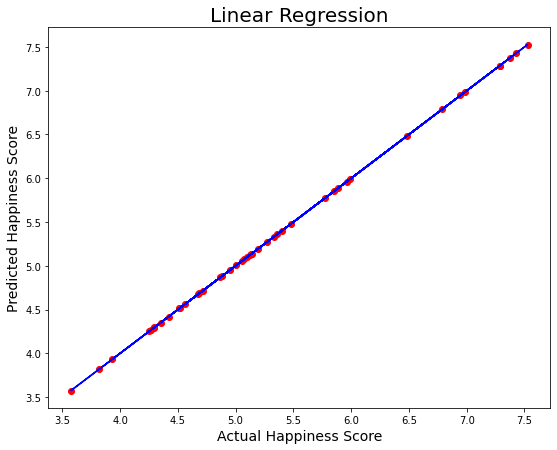

In [16]:
plt.figure(figsize=(9,7))
plt.scatter(pred_test,y_test,color='r')
plt.plot(pred_test,y_test,color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Linear Regression',fontsize=20)
plt.savefig('lr.png')
plt.show()

This shows that our model is working excellent and the best fit line covers all the data points,also there is no biasness or variance in this model anymore

### Regularization

In [18]:
#we have already confirmed that this data set has now low bias and low variance but still will check it by CV and Lasso model and if the accuracy for both the model predicts equal accuracy score then we can stop here i.e. no need to go for more model testing.
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [19]:
#will use parameter tuning
#gd=GridSearchCV(estimator=,param_grid=,cv=default we can check)
ls=Lasso()
dic={'alpha':[.0001,.001,.01,.1,1,10]}
gd=GridSearchCV(estimator=ls,param_grid=dic)
gd.fit(x_train,y_train)
print(gd.best_params_)
print(gd.best_score_)

{'alpha': 0.0001}
0.9999978205815829


In [31]:
#now predict the final model
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print('Lasso Training Score',ls.score(x_train,y_train))
pred_ls=ls.predict(x_test)
print('Lasso r2-score is-',r2_score(pred_ls,y_test))
print('CV Score is-',cvscore.mean())

Lasso Training Score 0.9999987136786499
Lasso r2-score is- 0.9999989548978125
CV Score is- 0.9999996739553119


## CONCLUSION

Since we are getting accuracy and cross validation score is 99.9% which shows our model is performing very well and there is optimal biasness and variance in this model.
Also,i dont think we need to perform anything else as model is giving excellent accuracy throughout process and dataset is not that big too perform ensemble technique.